# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]

print("Beginning Data Retrieval") 
print("-------------------------")

for city in cities:
    response = requests.get(query_url + city).json()
    time.sleep(0.2)
    if response['cod']== 200: 
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])     
        print(f"Processing Record Number {cities.index(city)} for : {city}")
    else:
        print(f"Record Number {cities.index(city)} not found for : {city}")
print("Finished Data Retrieval")

Beginning Data Retrieval
-------------------------
Processing Record Number 0 for : georgetown
Processing Record Number 1 for : zary
Processing Record Number 2 for : ammokhorion
Processing Record Number 3 for : airai
Processing Record Number 4 for : aklavik
Record Number 5 not found for : jabiru
Processing Record Number 6 for : namibe
Processing Record Number 7 for : kinkala
Processing Record Number 8 for : punta arenas
Record Number 9 not found for : umzimvubu
Processing Record Number 10 for : bilma
Processing Record Number 11 for : rikitea
Processing Record Number 12 for : mataura
Processing Record Number 13 for : rudnogorsk
Processing Record Number 14 for : kapaa
Processing Record Number 15 for : talnakh
Processing Record Number 16 for : ushuaia
Processing Record Number 17 for : kavieng
Processing Record Number 18 for : bluff
Processing Record Number 19 for : narsaq
Processing Record Number 20 for : chokurdakh
Processing Record Number 21 for : busselton
Processing Record Number 22 f

Processing Record Number 186 for : nouadhibou
Processing Record Number 187 for : manica
Processing Record Number 188 for : kotaparh
Processing Record Number 189 for : grand gaube
Processing Record Number 190 for : pevek
Processing Record Number 191 for : salalah
Processing Record Number 192 for : saldanha
Processing Record Number 193 for : leningradskiy
Processing Record Number 194 for : vila franca do campo
Processing Record Number 195 for : usinsk
Processing Record Number 196 for : asau
Processing Record Number 197 for : hamilton
Processing Record Number 198 for : porto velho
Processing Record Number 199 for : ngaoundere
Processing Record Number 200 for : dullewala
Processing Record Number 201 for : tricase
Processing Record Number 202 for : stephenville crossing
Record Number 203 not found for : bokspits
Processing Record Number 204 for : novo aripuana
Processing Record Number 205 for : surt
Processing Record Number 206 for : san cristobal
Processing Record Number 207 for : sao joao

Processing Record Number 371 for : nicolas bravo
Processing Record Number 372 for : esperance
Processing Record Number 373 for : baghdad
Processing Record Number 374 for : filiatra
Processing Record Number 375 for : morgan city
Processing Record Number 376 for : sola
Processing Record Number 377 for : moron
Processing Record Number 378 for : ostrovnoy
Processing Record Number 379 for : arman
Processing Record Number 380 for : goure
Processing Record Number 381 for : brae
Processing Record Number 382 for : vinh
Processing Record Number 383 for : cap malheureux
Processing Record Number 384 for : la palma
Processing Record Number 385 for : huilong
Processing Record Number 386 for : carutapera
Processing Record Number 387 for : ipanema
Processing Record Number 388 for : sembe
Record Number 389 not found for : yuzhno-yeniseyskiy
Processing Record Number 390 for : sebezh
Processing Record Number 391 for : geraldton
Processing Record Number 392 for : ewa beach
Processing Record Number 393 for

Processing Record Number 558 for : wanaka
Processing Record Number 559 for : naliya
Processing Record Number 560 for : buraydah
Processing Record Number 561 for : kidal
Processing Record Number 562 for : pathein
Processing Record Number 563 for : san patricio
Processing Record Number 564 for : los llanos de aridane
Processing Record Number 565 for : andros
Processing Record Number 566 for : berlevag
Processing Record Number 567 for : teruel
Processing Record Number 568 for : harper
Processing Record Number 569 for : lebanon
Processing Record Number 570 for : kuznechnoye
Processing Record Number 571 for : lerwick
Processing Record Number 572 for : veraval
Processing Record Number 573 for : asfi
Processing Record Number 574 for : yamada
Processing Record Number 575 for : coreau
Processing Record Number 576 for : altay
Record Number 577 not found for : suao
Processing Record Number 578 for : te anau
Processing Record Number 579 for : trapani
Processing Record Number 580 for : la peca
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_pd = pd.DataFrame({"City": City,
                          "Cloudiness": Cloudiness,
                          "Country": Country,
                          "Date": Date,
                          "Humidity": Humidity,
                          "Latitude": Lat,
                          "Longitude": Lng,
                          "Max Temperature" : Max_Temp,
                          "Wind Speed": Wind_Speed})
weather_pd.count()

City               578
Cloudiness         578
Country            578
Date               578
Humidity           578
Latitude           578
Longitude          578
Max Temperature    578
Wind Speed         578
dtype: int64

In [6]:
weather_pd.head()
weather_pd.to_csv("weather_pd.csv", index= False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
from datetime import date
today = date.today().strftime("%d/%m/%Y")

#### Latitude vs. Temperature Plot

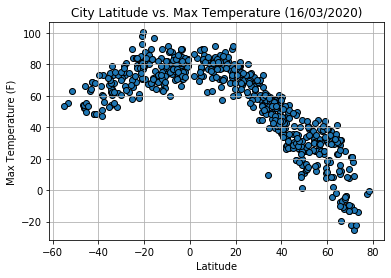

<Figure size 432x288 with 0 Axes>

In [8]:
x_values = weather_pd['Latitude']
y_values = weather_pd['Max Temperature']
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.grid(True)
plt.show()
plt.savefig("Lat_vs_Temp.png")

##this graphs shows the relationship between latitude and temperatures. As seen in the figure below the warmest temps are found at the equator (lat=0), and then we can see it decreasing as you move in either direction.

#### Latitude vs. Humidity Plot

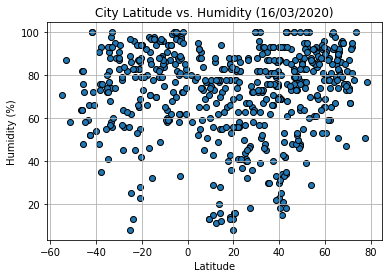

<Figure size 432x288 with 0 Axes>

In [9]:
x_values = weather_pd['Latitude']
y_values = weather_pd['Humidity']
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({today})")
plt.grid(True)
plt.show()
plt.savefig("Lat_vs_Hum.png")
##in this one there isnt as clear of a pattern, byt we can note that the driest places are around 20 latitude, but the majority of places seem to be above 60% humidity

#### Latitude vs. Cloudiness Plot

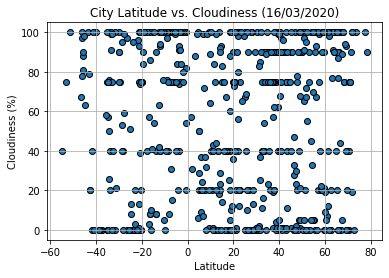

<Figure size 432x288 with 0 Axes>

In [10]:
x_values = weather_pd['Latitude']
y_values = weather_pd['Cloudiness']
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.grid(True)
plt.show()
plt.savefig("Lat_vs_Cloud.png")
## here we can see that the majority of cloudiness is in intervals of 20 but there doesnt seem to be a clear pattern with latitude

#### Latitude vs. Wind Speed Plot

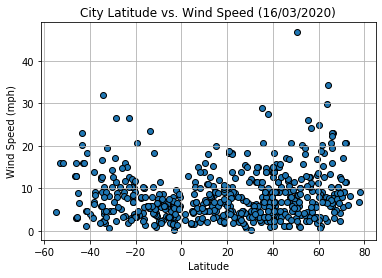

<Figure size 432x288 with 0 Axes>

In [11]:
x_values = weather_pd['Latitude']
y_values = weather_pd['Wind Speed']
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.grid(True)
plt.show()
plt.savefig("Lat_vs_Wind.png")
# here we can see that windspeeds seem to increase as you move away from the equator

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def LinearRegressPLot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(f"The r-squared is: {rvalue}")
    plt.plot(x_values,regress_values,"r-")
    plt.scatter(x_values,y_values, marker="o")
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.annotate(line_eq,(0,0), xycoords ='axes points' ,fontsize=15,color="red")
    plt.show()
    

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem= weather_pd.loc[weather_pd['Latitude']>=0]
southern_hem= weather_pd.loc[weather_pd['Latitude']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9094656686401125


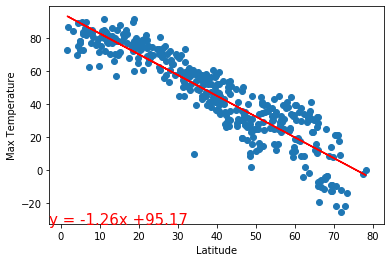

In [14]:
LinearRegressPLot(northern_hem['Latitude'], northern_hem['Max Temperature'])
# here we can see that temperature decreases as you move up to higher latitudes as expected

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6162758467362452


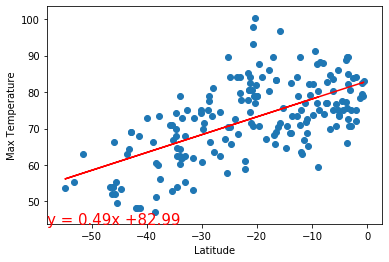

In [15]:
LinearRegressPLot(southern_hem['Latitude'], southern_hem['Max Temperature'])
#similarly here temperature increases as you go to bigger latitudes or decreases as you move away from the equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.30462518183691345


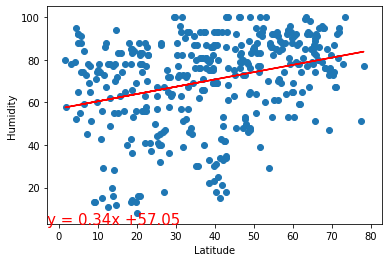

In [16]:
LinearRegressPLot(northern_hem['Latitude'], northern_hem['Humidity'])
#here there isnt very good correlation but we do see a positive slope of increasing humidity as you increase latitudes

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20948741051776618


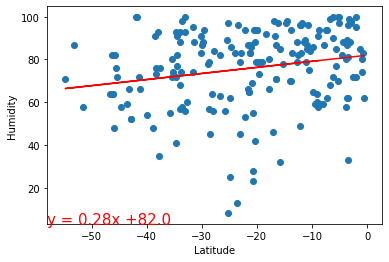

In [17]:
LinearRegressPLot(southern_hem['Latitude'], southern_hem['Humidity'])
#here the pattern is that it becomes drier as you move south of the equator, but very bad correlation

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1574838954684412


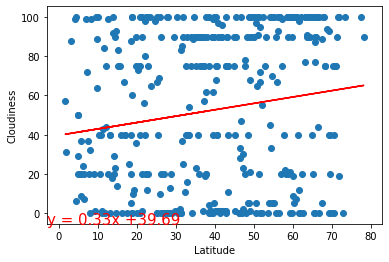

In [18]:
LinearRegressPLot(northern_hem['Latitude'], northern_hem['Cloudiness'])
#very poor correlation to draw any conclusions

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20342893245745214


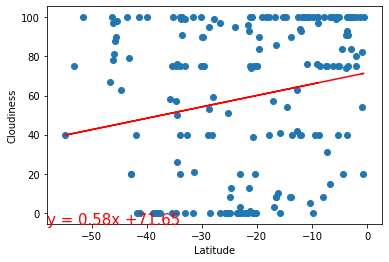

In [19]:
LinearRegressPLot(southern_hem['Latitude'], southern_hem['Cloudiness'])
#very poor correlation to draw any conclusions

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1744154004485702


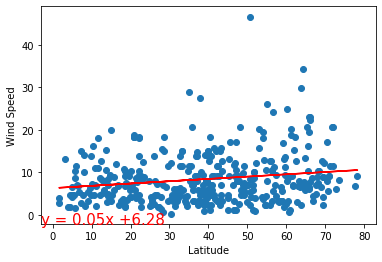

In [20]:
LinearRegressPLot(northern_hem['Latitude'], northern_hem['Wind Speed'])
#very poor correlation to draw any conclusions, very small positive slope

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3438499024013525


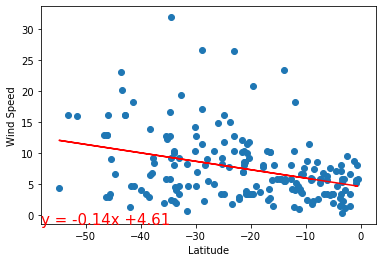

In [21]:
LinearRegressPLot(southern_hem['Latitude'], southern_hem['Wind Speed'])
#very poor correlation to draw any conclusions, negative slope which matches pattern of moving away from equator in above graph